In [ ]:
#Technologies: solar and battery

import pypsa
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

n=pypsa.Network()

#Snapshots
n.set_snapshots(value=pd.date_range(freq="h", start="2013-01-01", end="2014-01-01", inclusive='left'))
n.snapshot_weightings[:] *= 8760.0 / n.snapshot_weightings.sum()

print(n)


In [ ]:
pd.date_range(freq="h", start="2013-01-01", end="2014-01-01", inclusive='left')

In [ ]:
#I create the bus 

n.madd("Bus", ["onebus"])

#To see the bus: n.buses

In [ ]:

# #I import a time series for generation 

with xr.open_dataset(r'C:\Users\denis\OneDrive\Desktop\Mini grids\pypsa-distribution\time_series\Generation_timeseries\profile_solar.nc') as ds:


    solar=ds["profile"].transpose("time", "bus").to_pandas()

#I take just the first column(one bus)

solar=solar.iloc[:, 0]

solar=pd.DataFrame(solar,
                  index=n.snapshots)
print(solar)

print(solar)
#I create a numpy array (needed for later plotting)
import numpy as np
solar=np.array(solar)
print(solar)



In [ ]:
#I connect a generator to the bus "onebus"

n.madd("Generator", ["solargenerator"], bus = "onebus", p_nom_extendable=True, p_max_pu=solar)



In [ ]:
#I import a time series for load as pandas dataframe
import pandas as pd

load_df=pd.read_csv(r'C:\Users\denis\OneDrive\Desktop\Mini grids\pypsa-distribution\time_series\Load_timeseries\sample_profile.csv', parse_dates=True)

#Used at first, now changed to make it look similar to solar data
# date_index=pd.date_range('01/01/2013', periods=8760, freq='h')
# date_index = pd.DataFrame(date_index, columns=['time'])
# date_index['bus 0']=load_df['bus 0']
# load=date_index

load_df=load_df["bus 0"]
load_df=pd.DataFrame(load_df)
load= load_df.set_index([n.snapshots])

#I create a numpy array (needed for later plotting)
load=np.array(load)
print(load)



In [ ]:

#I connect the load to the bus "onebus"

n.madd("Load", ["MyLoad"], bus=["onebus"], p_set= load)


# n.loads



In [8]:
#n.buses

In [ ]:
n.madd("StorageUnit", ["mySU"] , bus="onebus")


In [10]:
#I want to see my whole network:

print(n)

PyPSA Network
Components:
 - Bus: 1
 - Generator: 1
 - Load: 1
 - StorageUnit: 1
Snapshots: 8760


<AxesSubplot: xlabel='snapshot'>

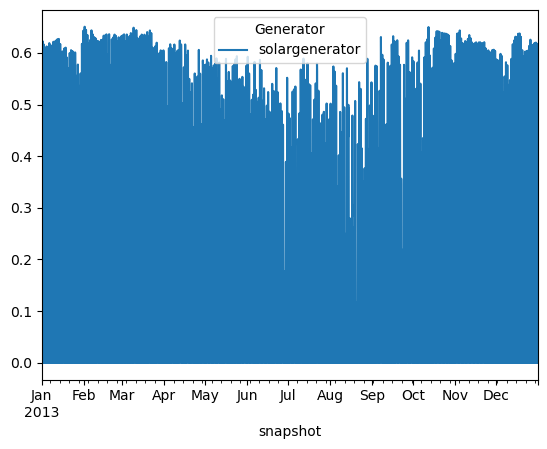

In [14]:
#Plotting the generation
n.generators_t.p_max_pu.plot()


<AxesSubplot: xlabel='snapshot'>

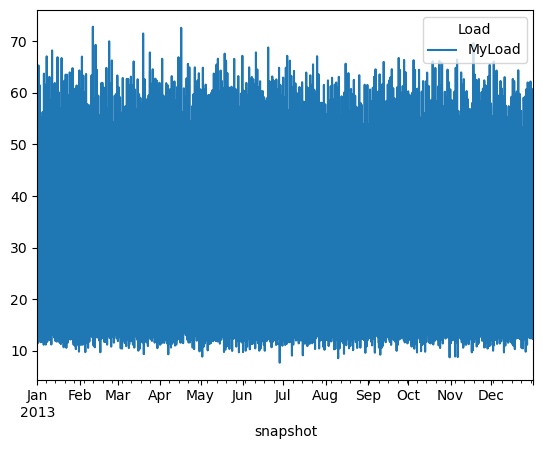

In [15]:
#Plotting the load
n.loads_t.p_set.plot()
